In [1]:
import zipfile

import numpy as np
import pandas as pd
import os
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from pathlib import Path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'cv2'

In [67]:
for path in glob.glob('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/*.jpg'):
    if not(os.path.exists('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat') or os.path.exists('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog')):
        os.makedirs('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat')
        os.makedirs('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog')
        print('Done!')
    
    if 'cat' in path:
        shutil.move(path, 'Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/cat/' + path.split('/')[-1])
    else:
        shutil.move(path, 'Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/dog/' + path.split('/')[-1])

In [68]:
my_dataset = {}
for class_name in glob.glob('Z:/Virtual Internships/Prodigy/PRODIGY_ML_03/train/*'):
    my_dataset[class_name.split('/')[-1]] = glob.glob(class_name + '/*')

In [69]:
print(f"These are the keys in my dataset {my_dataset.keys()}")

These are the keys in my dataset dict_keys(['train\\cat', 'train\\dog'])


In [70]:
x = my_dataset.keys()
y = [len(keys) for keys in my_dataset.values()]

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"The shape of my data before splitting is {y}")

The shape of my data before splitting is [12505, 12505]


In [72]:
def img_props(file):
    image = cv2.imread(file)
    h, w, d = image.shape
    return h, w, d

In [73]:
df = pd.DataFrame(columns=['Height',
                           'Width',
                           'Channels',
                           'Class'])

for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        h,w,d = img_props(path)
        df.loc[len(df)] = [h,w,d,pet_class]

df.head(11)

,Height,Width,Channels,Class
0,374,500,3,train\cat
1,280,300,3,train\cat
2,499,489,3,train\cat
3,499,403,3,train\cat
4,149,150,3,train\cat
5,359,431,3,train\cat
6,374,500,3,train\cat
7,471,499,3,train\cat
8,375,499,3,train\cat
9,239,320,3,train\cat


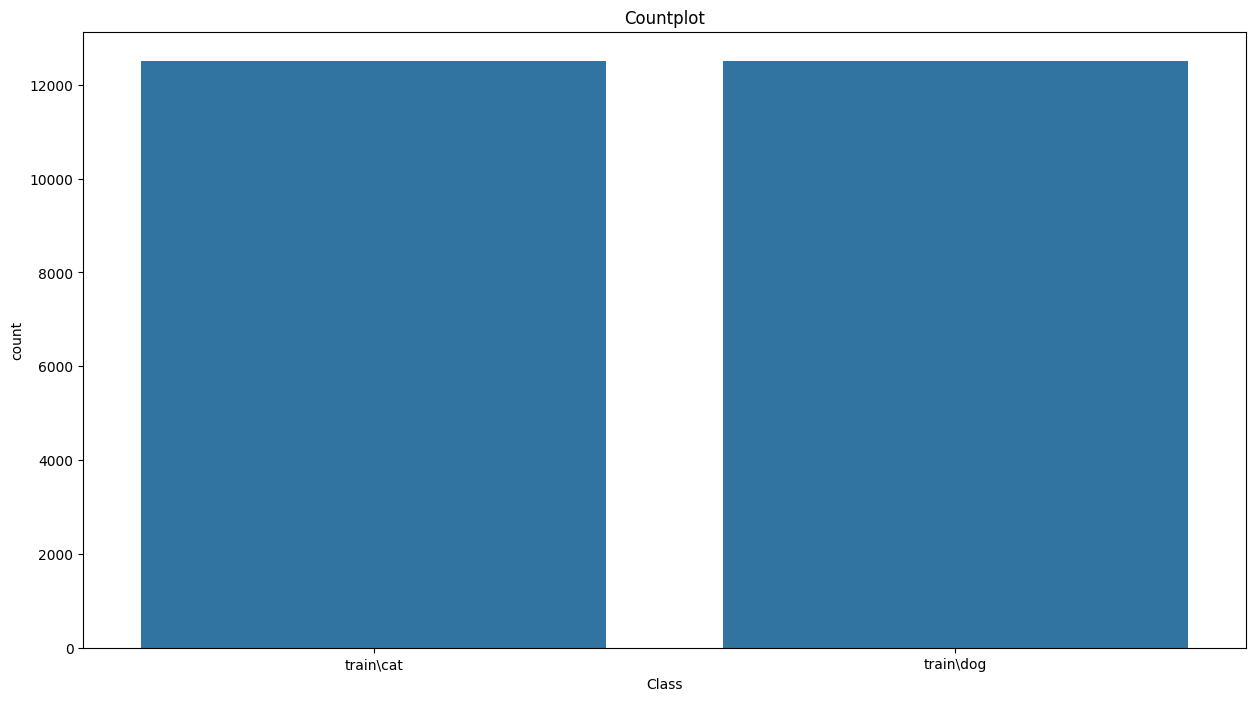

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Class')
plt.title('Countplot')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivo\AppData\Local\Temp\ipykernel_12216\2580569636.py:3: SyntaxWarning: invalid escape sequence '\d'
  sns.histplot(x = df[df['Class']=='train\dog']['Height'])
C:\Users\shivo\AppData\Local\Temp\ipykernel_12216\2580569636.py:7: SyntaxWarning: invalid escape sequence '\d'
  sns.histplot(x = df[df['Class']=='train\dog']['Width'])


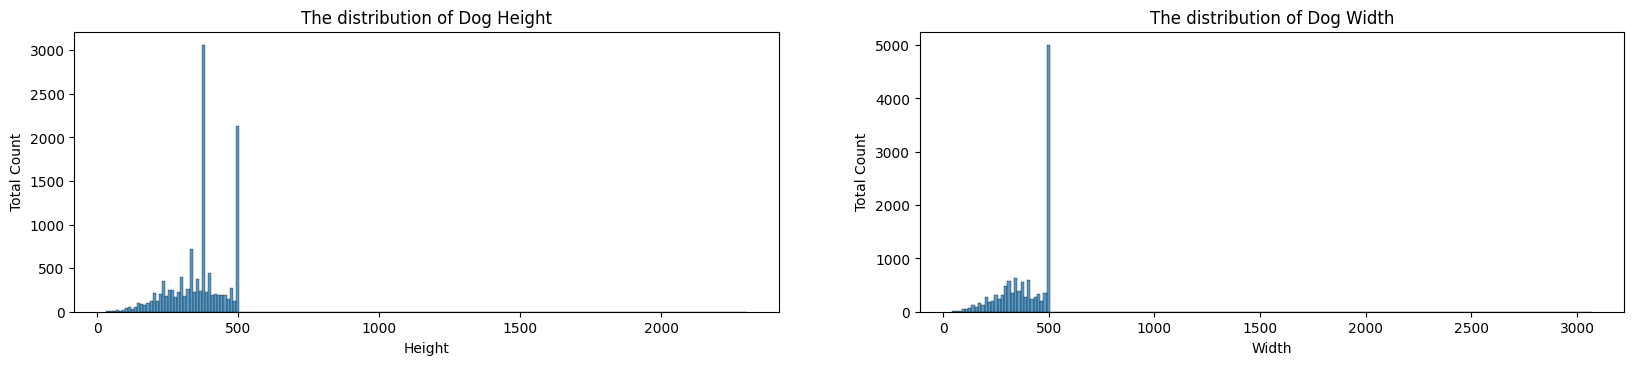

In [75]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='train\dog']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='train\dog']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Width')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\shivo\AppData\Local\Temp\ipykernel_12216\885074869.py:3: SyntaxWarning: invalid escape sequence '\c'
  sns.histplot(x = df[df['Class']=='train\cat']['Height'])
C:\Users\shivo\AppData\Local\Temp\ipykernel_12216\885074869.py:7: SyntaxWarning: invalid escape sequence '\c'
  sns.histplot(x = df[df['Class']=='train\cat']['Width'])


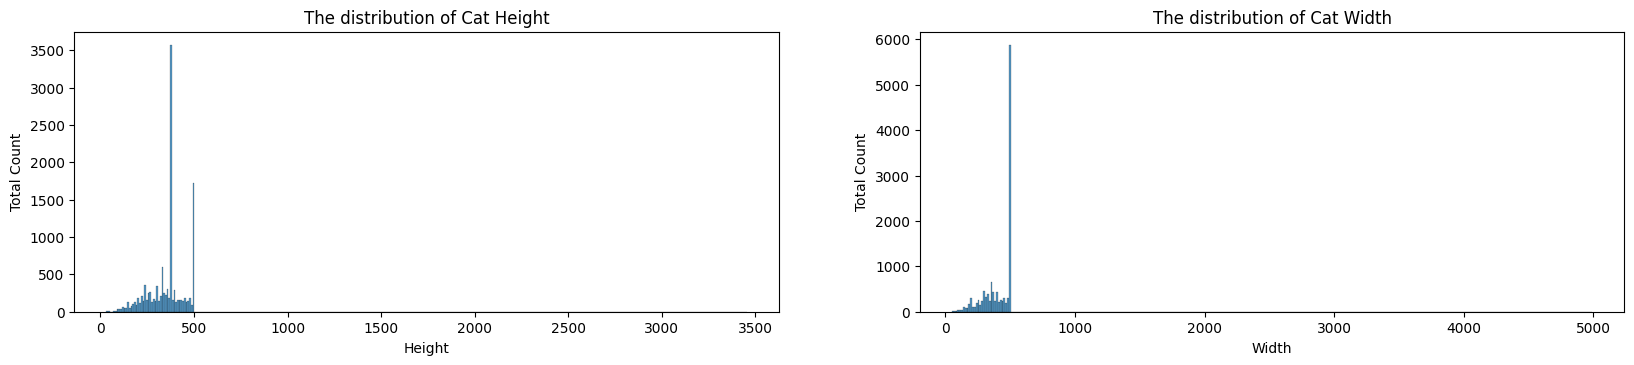

In [76]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='train\cat']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='train\cat']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Width')
plt.show()

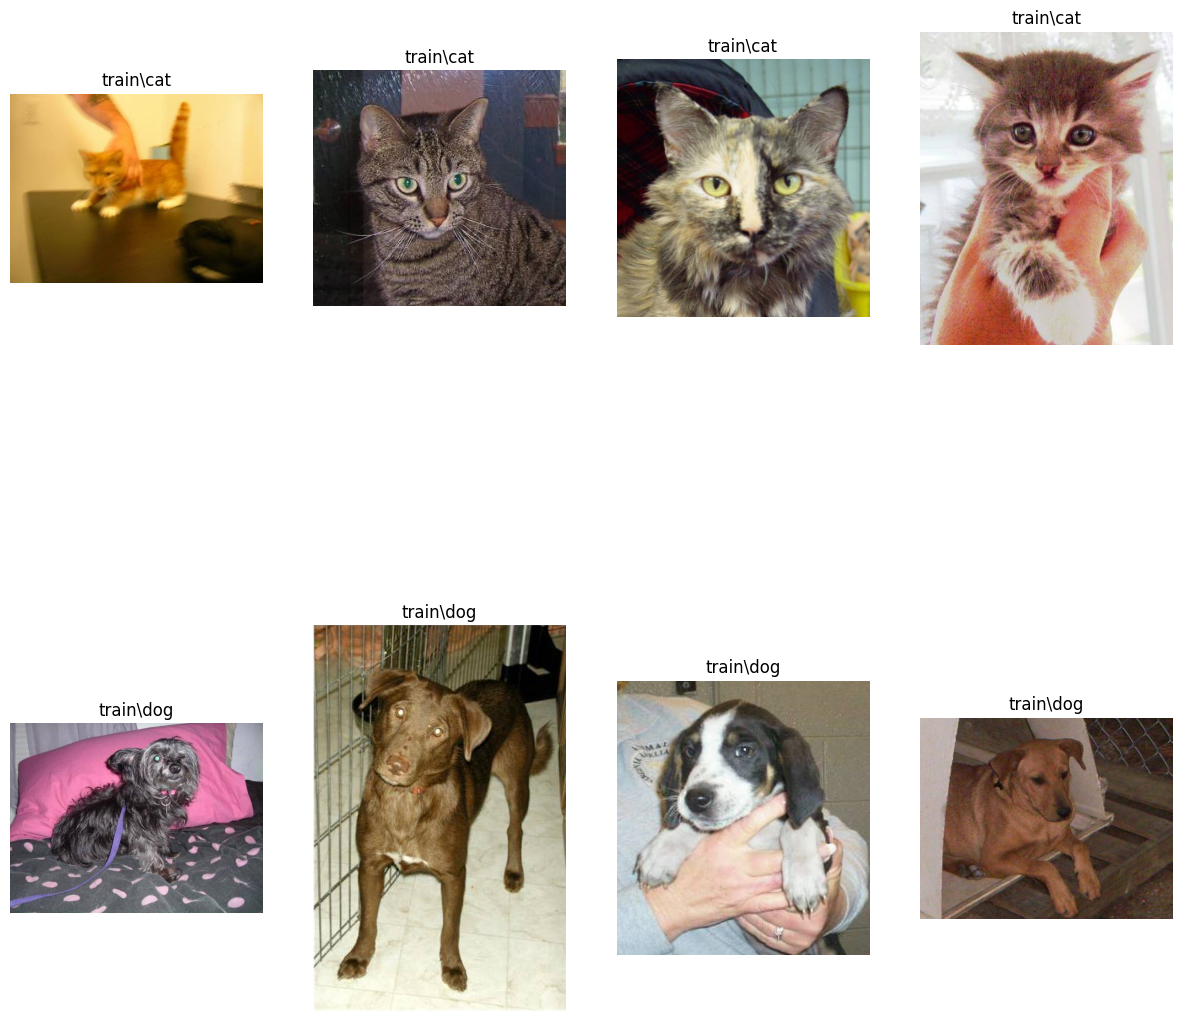

In [77]:
count = 0
plt.figure(figsize=(15,15))
for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        sp = plt.subplot(2, 4, count + 1, )
        sp.axis('Off')
        sp.set_title(pet_class)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        count +=1 
        if count % 4 == 0:
            break

plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['Class'] = lbl_encoder.fit_transform(df['Class'])
df.head()

,Height,Width,Channels,Class
0,374,500,3,0
1,280,300,3,0
2,499,489,3,0
3,499,403,3,0
4,149,150,3,0


In [79]:
df['Class'].value_counts().head()

Class
0    12505
1    12505
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X =  df.drop(['Class'],axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [81]:
X_train.shape, y_train.shape

((20008, 3), (20008,))

In [83]:
X_train = X_train/255
X_test = X_test/255
X_train

,Height,Width,Channels
20494,0.005998,0.003583,0.000046
23972,0.004414,0.005383,0.000046
13543,0.007628,0.007689,0.000046
1379,0.003691,0.004906,0.000046
20046,0.004798,0.004075,0.000046
...,...,...,...
5695,0.005767,0.007674,0.000046
8006,0.001584,0.003691,0.000046
17745,0.003691,0.004906,0.000046
17931,0.005367,0.004398,0.000046


In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [89]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5599760095961616


In [90]:
print(f"The Classification Report for SVC model is \n{classification_report(y_test, y_pred)}")

The Classification Report for SVC model is 
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      2526
           1       0.57      0.47      0.52      2476

    accuracy                           0.56      5002
   macro avg       0.56      0.56      0.56      5002
weighted avg       0.56      0.56      0.56      5002



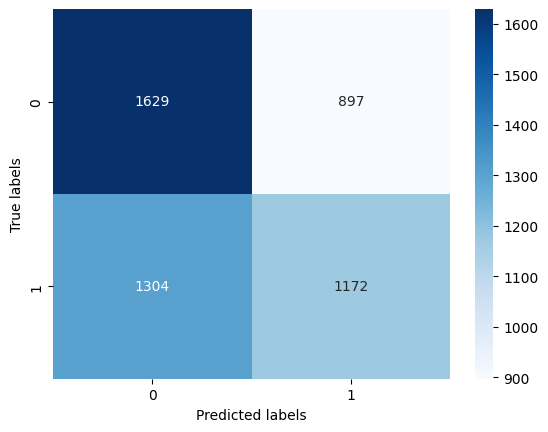

In [91]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [92]:
print(f"The Accuracy score for  my SVC model is \n{accuracy_score(y_test, y_pred)*100}%")

The Accuracy score for  my SVC model is 
55.99760095961616%
